### Data Loading

This cell loads the climate change dataset using `pandas.read_csv()` and confirms successful import by printing its shape. It also previews the first few rows using `df.head()` to understand the structure of the dataset.


In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/climate-change-dataset/climate_change_dataset.csv')
print(f"Dataset loaded successfully. Shape: {df.shape}")
df.head()


Dataset loaded successfully. Shape: (1000, 10)


Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0  2006         UK                   8.9                          9.3   
1  2019        USA                  31.0                          4.8   
2  2014     France                  33.9                          2.8   
3  2010  Argentina                   5.9                          1.8   
4  2007    Germany                  26.9                          5.6   

   Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
0                  3.1           1441   530911230                  20.4   
1                  4.2           2407   107364344                  49.2   
2                  2.2           1241   441101758                  33.3   
3                  3.2           1892  1069669579                  23.7   
4                  2.4           1743   124079175                  12.5   

   Extreme Weather Events  Forest Area (%)  
0                      14             59.8  
1                       8             31.0  
2                       9             35.5  
3                       7             17.7  
4                       4             17.4

### Feature and Target Selection

This cell defines the target variable as `Avg Temperature (°C)` and manually selects a set of relevant numeric features from the dataset. These selected features are then separated into the feature matrix `X` and the target vector `y`.


In [ ]:
import pandas as pd

target = 'Avg Temperature (°C)'

# Manually select relevant numeric features
feature_cols = [
    'CO2 Emissions (Tons/Capita)',
    'Sea Level Rise (mm)',
    'Rainfall (mm)',
    'Population',
    'Renewable Energy (%)',
    'Extreme Weather Events',
    'Forest Area (%)'
]

X = df[feature_cols]
y = df[target]

print(f"Selected {len(feature_cols)} features for modeling.")
X.head()


Selected 7 features for modeling.


CO2 Emissions (Tons/Capita)  Sea Level Rise (mm)  Rainfall (mm)  \
0                          9.3                  3.1           1441   
1                          4.8                  4.2           2407   
2                          2.8                  2.2           1241   
3                          1.8                  3.2           1892   
4                          5.6                  2.4           1743   

   Population  Renewable Energy (%)  Extreme Weather Events  Forest Area (%)  
0   530911230                  20.4                      14             59.8  
1   107364344                  49.2                       8             31.0  
2   441101758                  33.3                       9             35.5  
3  1069669579                  23.7                       7             17.7  
4   124079175                  12.5                       4             17.4

### Feature Importance Plot

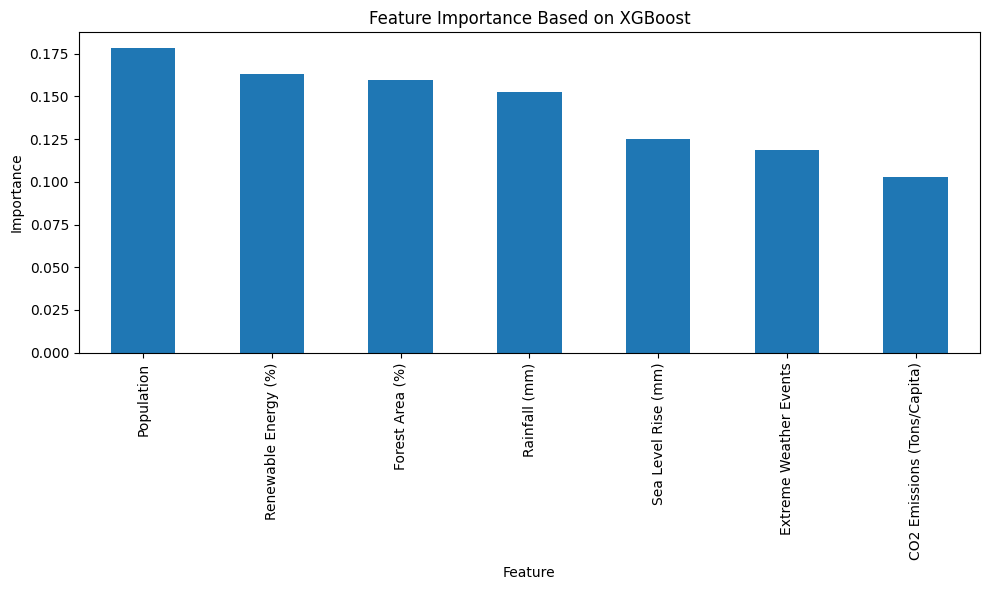

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Target and feature columns
target = 'Avg Temperature (°C)'
feature_cols = [
    'CO2 Emissions (Tons/Capita)',
    'Sea Level Rise (mm)',
    'Rainfall (mm)',
    'Population',
    'Renewable Energy (%)',
    'Extreme Weather Events',
    'Forest Area (%)'
]

# Prepare data
X = df[feature_cols]
y = df[target]

# Train an XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X, y)

# Get feature importance
importance = pd.Series(xgb_model.feature_importances_, index=feature_cols)

# Plot feature importance
plt.figure(figsize=(10, 6))
importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance Based on XGBoost")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


### Handling Missing Values

This cell checks for missing values in the selected features and fills them using column-wise mean imputation. It also confirms that all missing values have been successfully handled.


In [ ]:
import numpy as np

# Check for missing values
missing = X.isnull().sum()
print("Missing values per column:\n", missing)

# Fill missing values with column means
X_filled = X.fillna(X.mean())

# Optional: Confirm no missing values remain
print("\nMissing values after imputation:\n", X_filled.isnull().sum())


Missing values per column:
 CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64

Missing values after imputation:
 CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64


 Standardize Features using StandardScaler

### Feature Standardization

This cell applies standardization to the feature matrix using `StandardScaler`, transforming all features to have zero mean and unit variance. It prints the first five rows of the standardized feature matrix for verification.


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

print("Features standardized successfully.")
print("Feature matrix after standardization (first 5 rows):")
pd.DataFrame(X_scaled, columns=X_filled.columns).head()


Features standardized successfully.
Feature matrix after standardization (first 5 rows):


CO2 Emissions (Tons/Capita)  Sea Level Rise (mm)  Rainfall (mm)  \
0                    -0.200611             0.078917      -0.420197   
1                    -1.002485             1.039190       0.943012   
2                    -1.358873            -0.706761      -0.702435   
3                    -1.537067             0.166215       0.216249   
4                    -0.859929            -0.532166       0.005982   

   Population  Renewable Energy (%)  Extreme Weather Events  Forest Area (%)  
0   -0.426387             -0.532269                1.517721         1.105674  
1   -1.461483              1.689213                0.160391        -0.550422  
2   -0.645870              0.462770                0.386613        -0.291657  
3    0.890271             -0.277724               -0.065831        -1.315216  
4   -1.420634             -1.141633               -0.744495        -1.332467

### Exploratory Data Analysis (EDA)

This cell performs comprehensive EDA on the standardized feature set and target variable.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


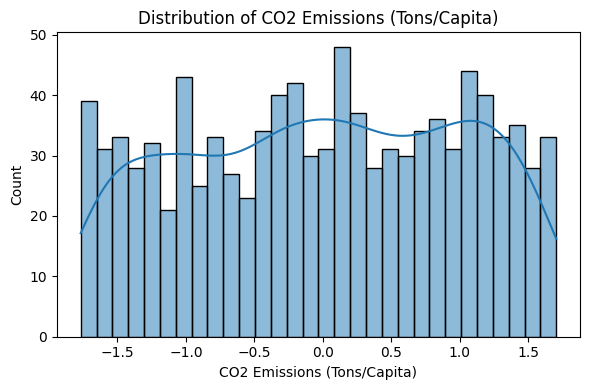

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


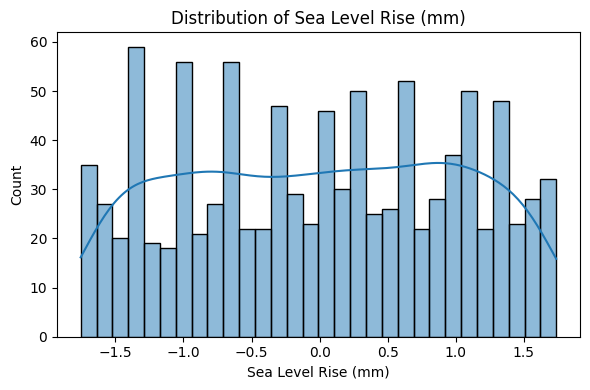

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


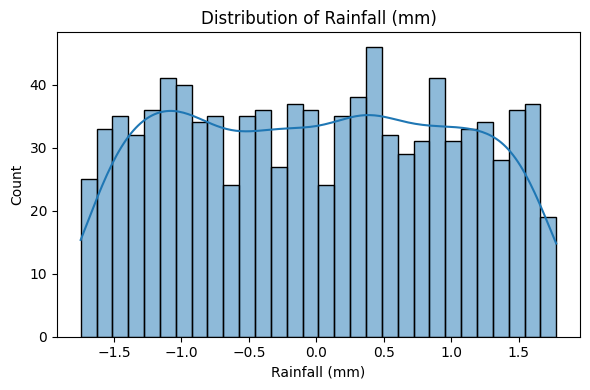

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


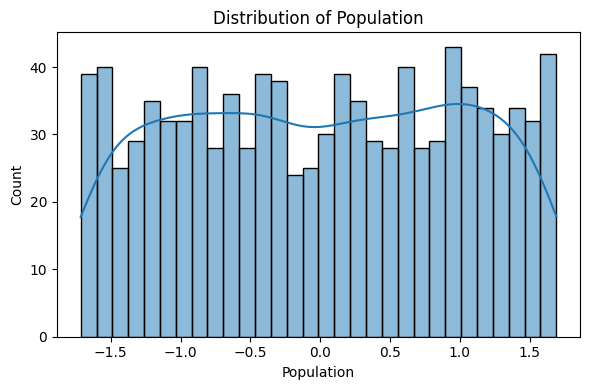

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


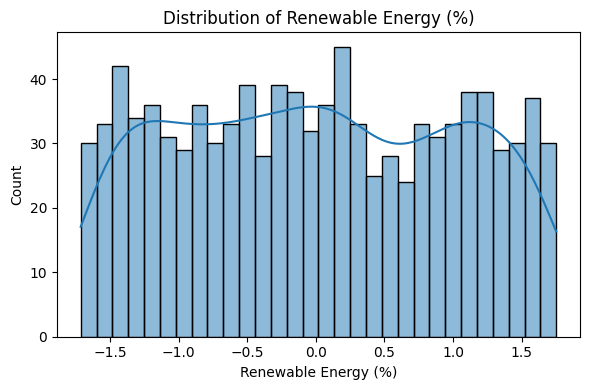

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


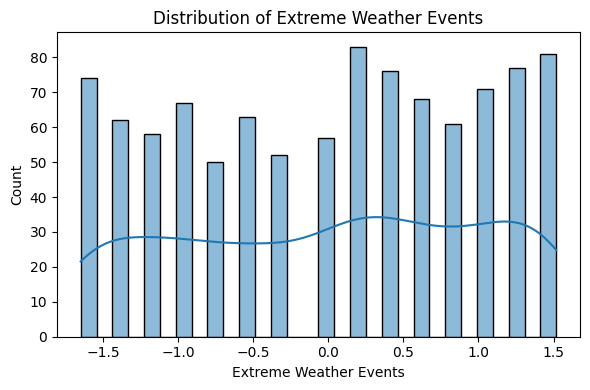

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


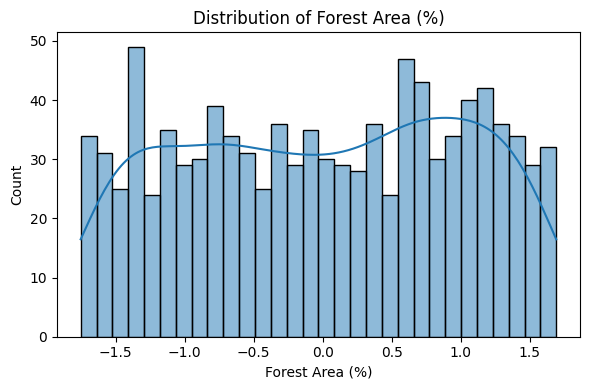

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


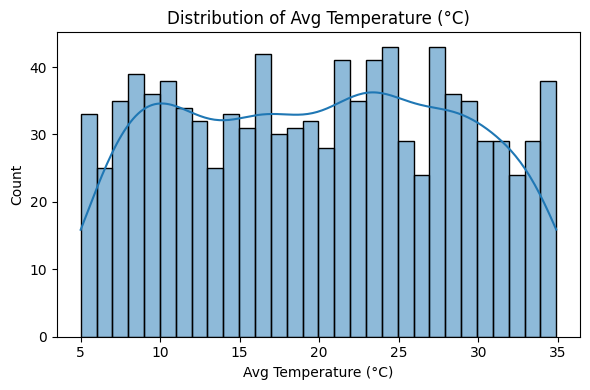

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


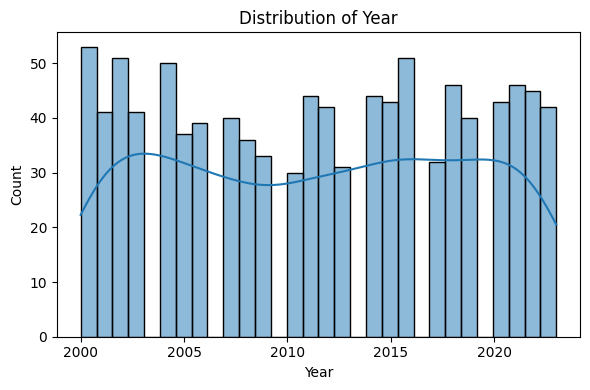

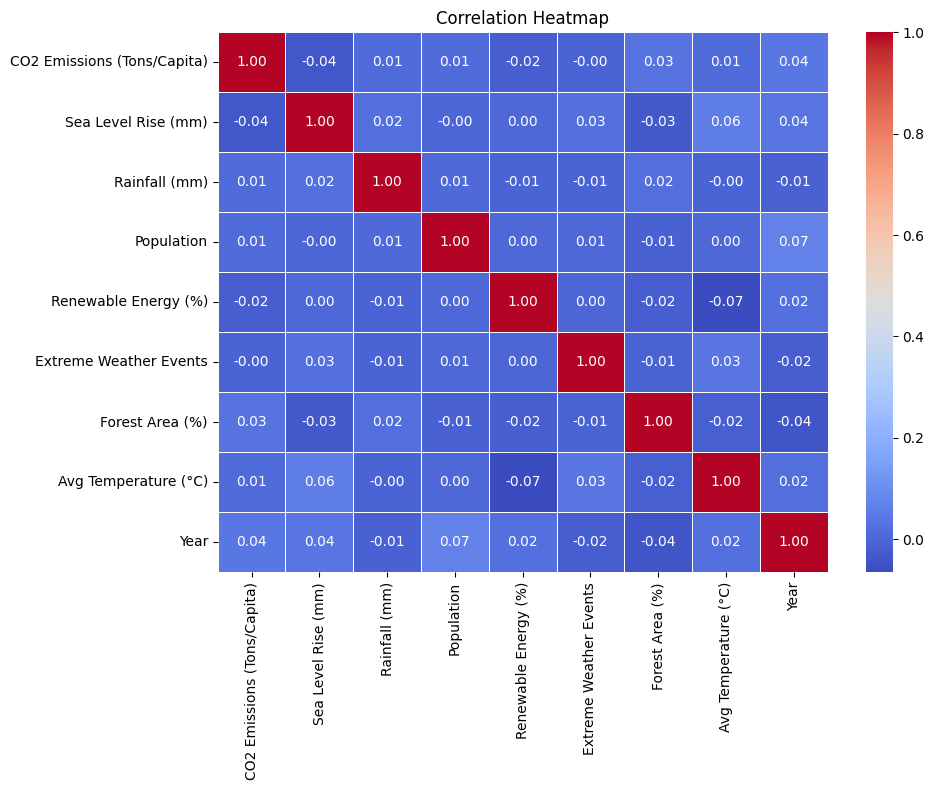

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

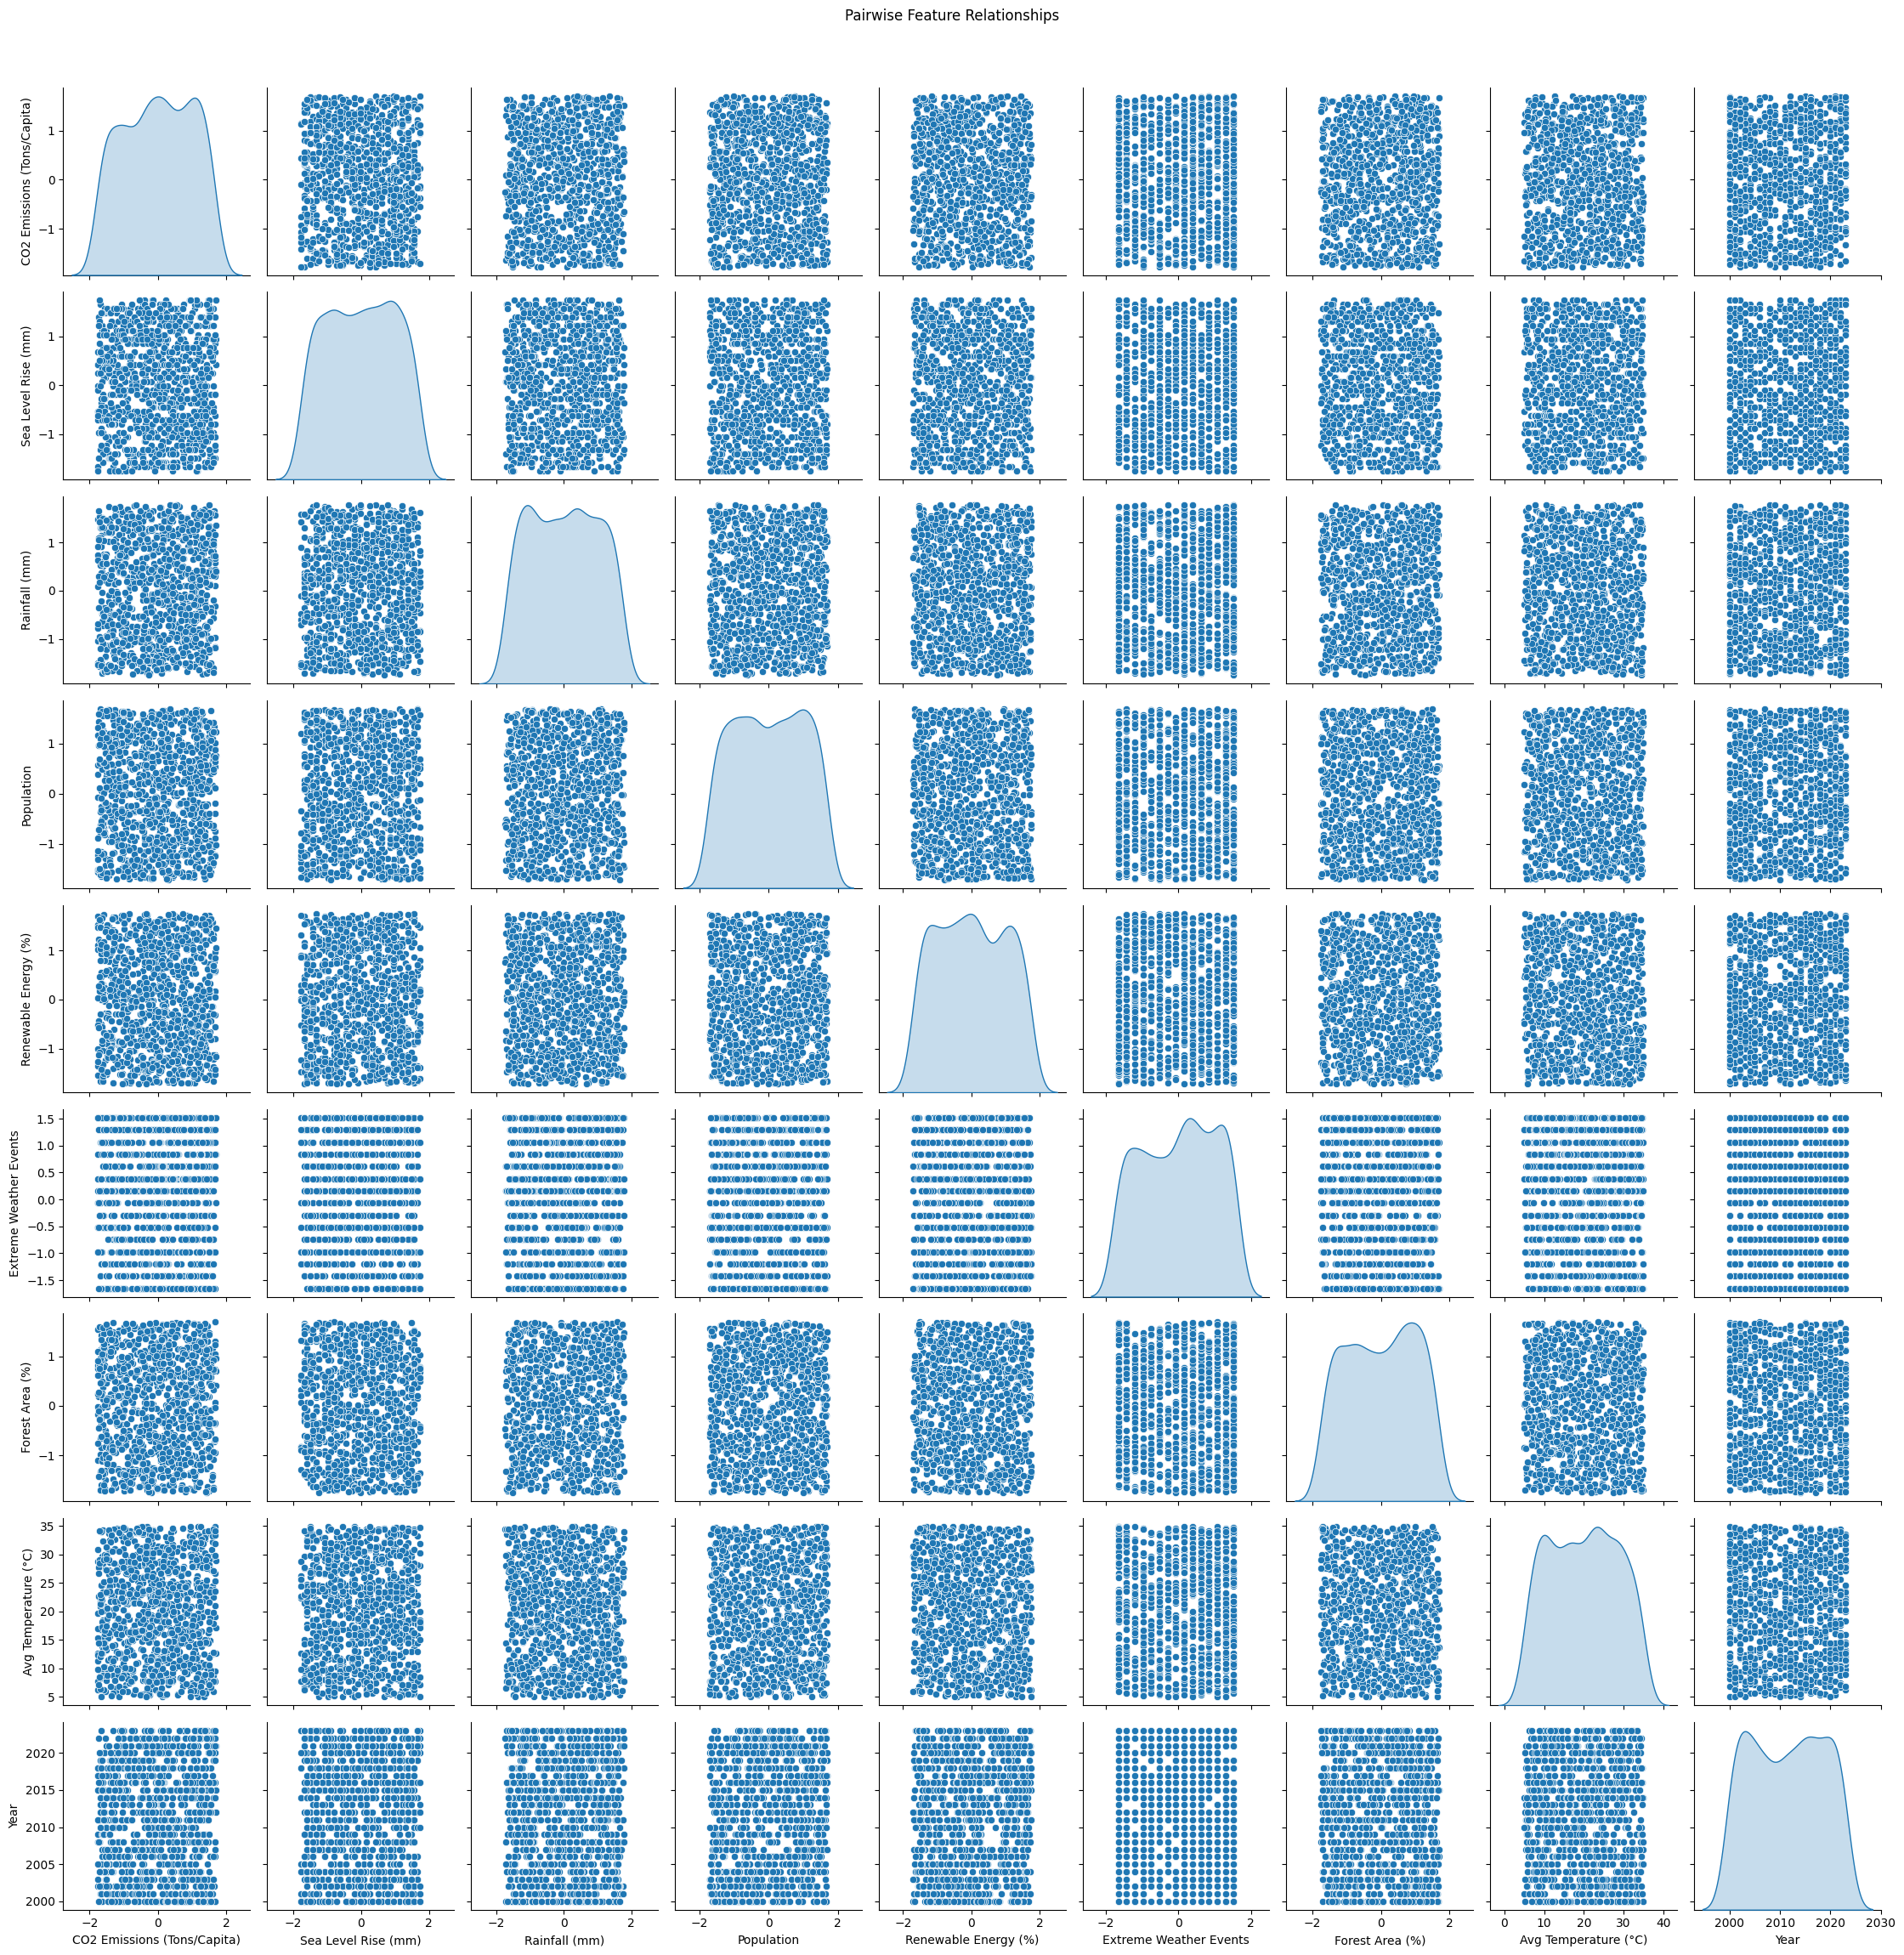

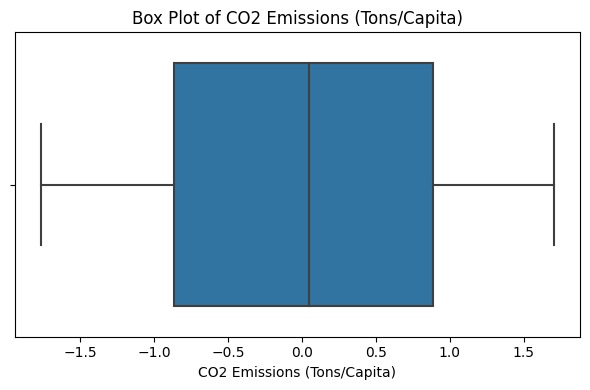

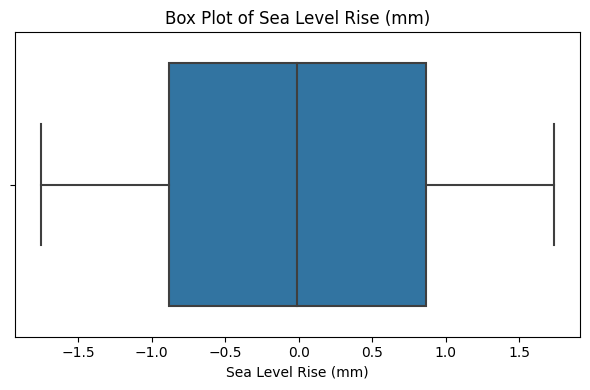

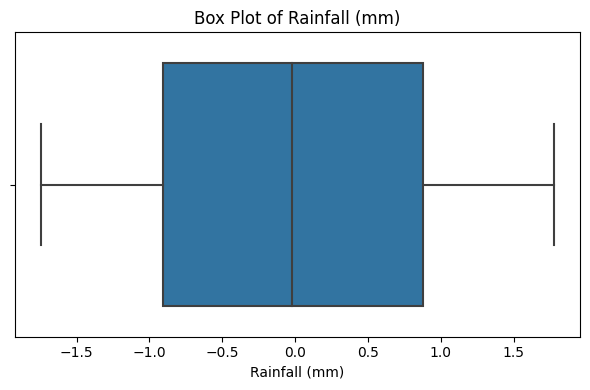

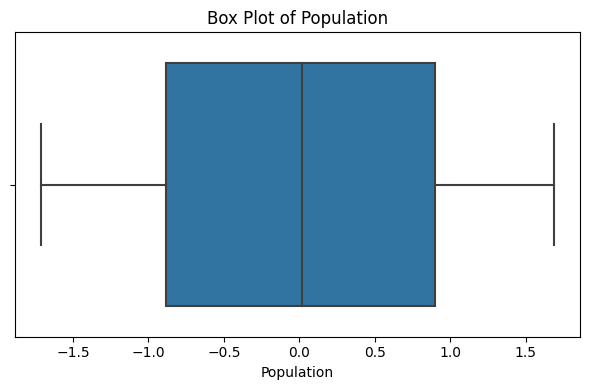

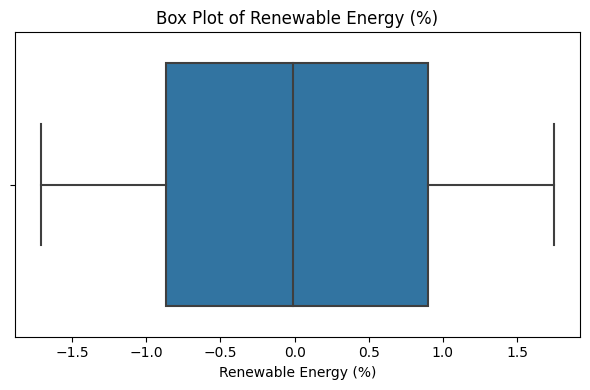

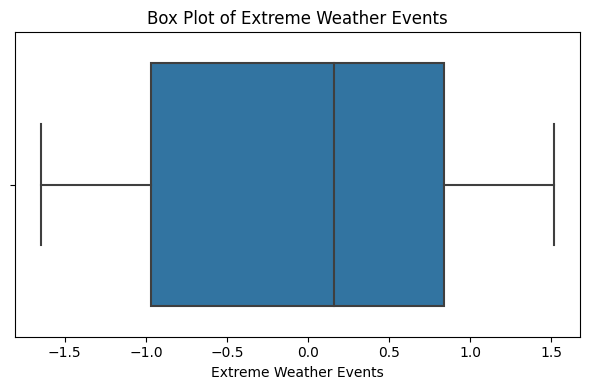

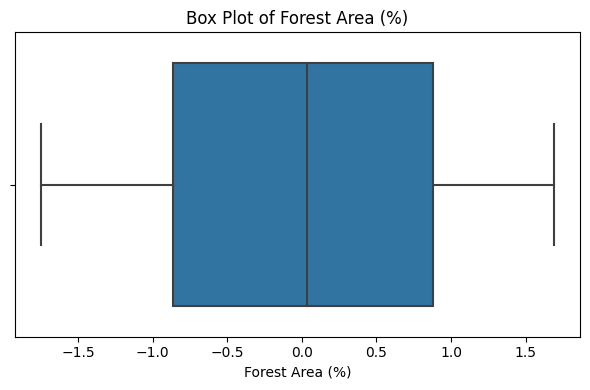

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


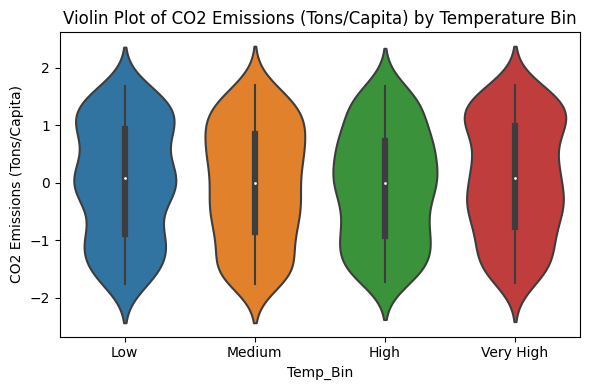

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


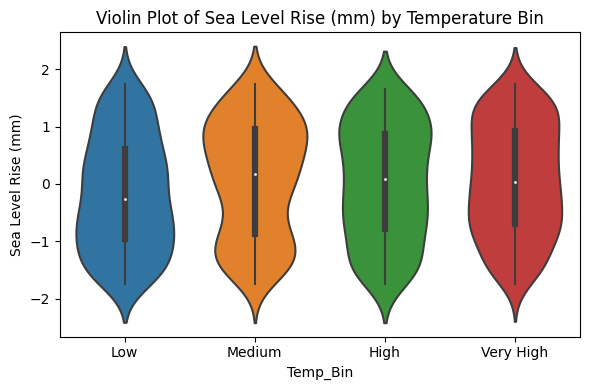

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


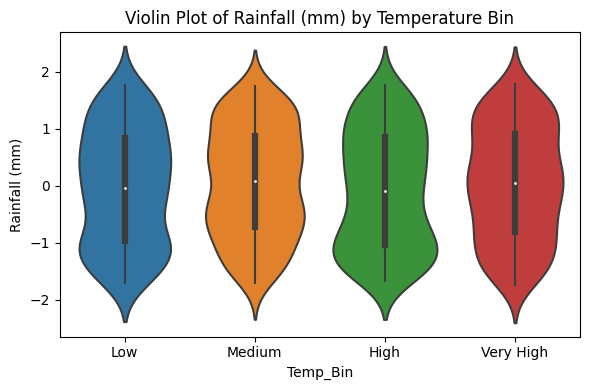

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


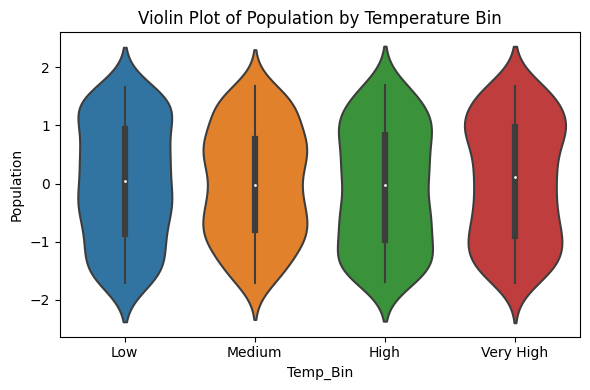

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


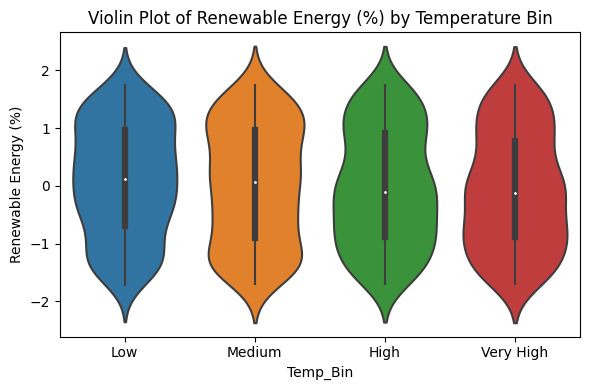

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


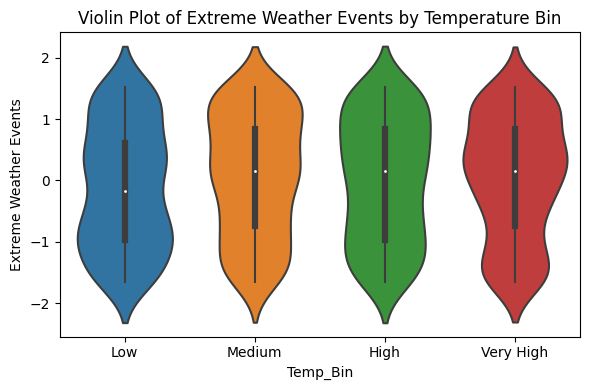

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


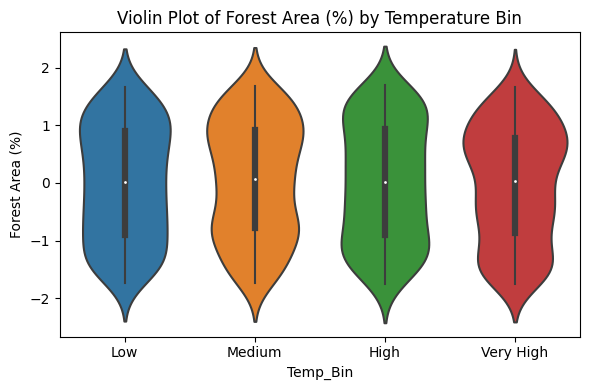

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


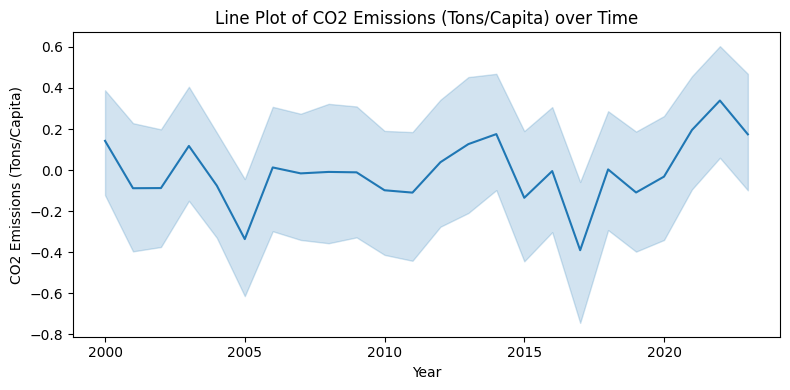

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


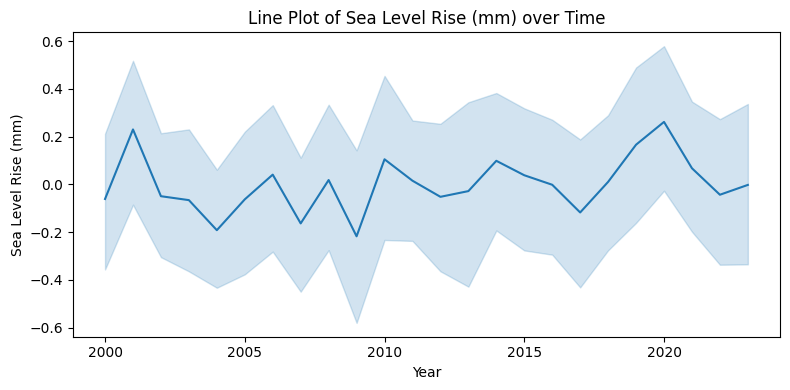

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


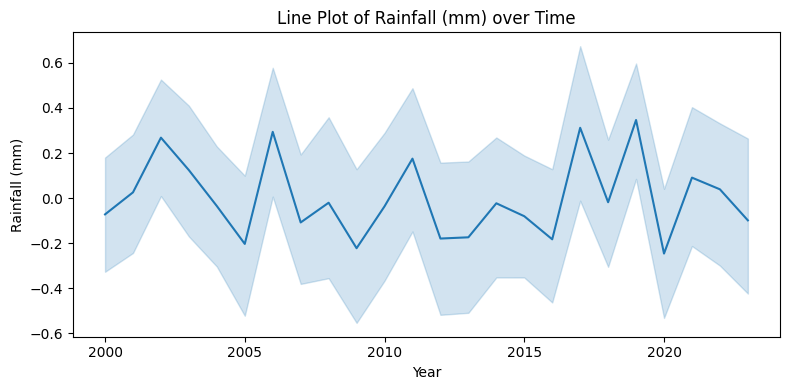

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


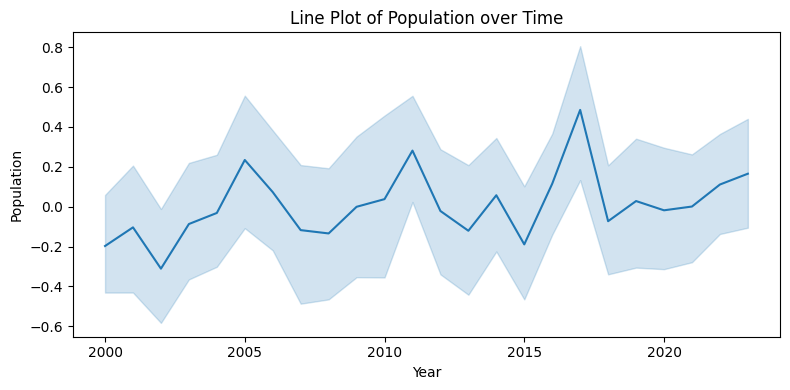

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


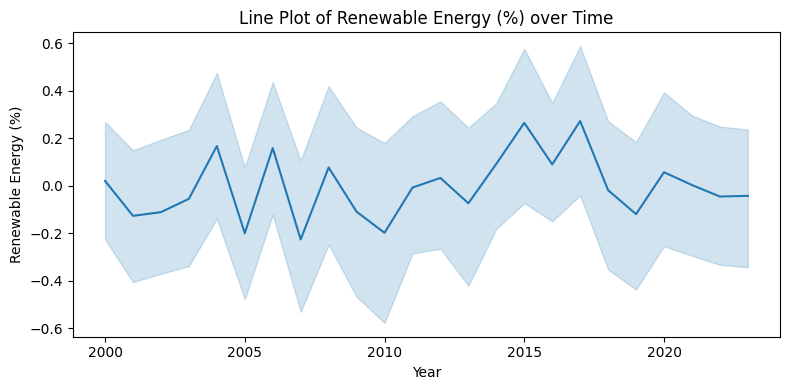

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


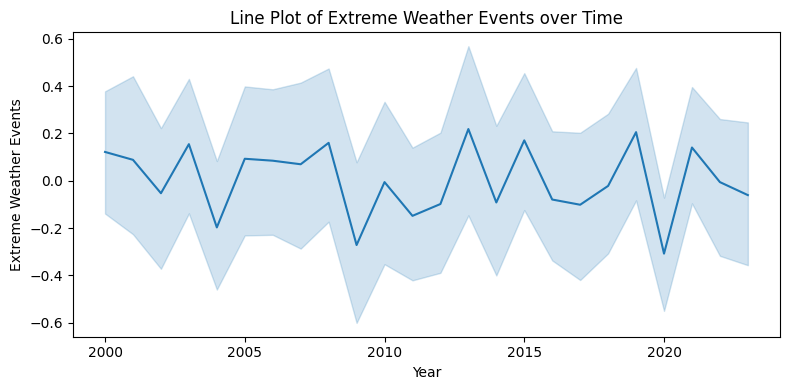

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


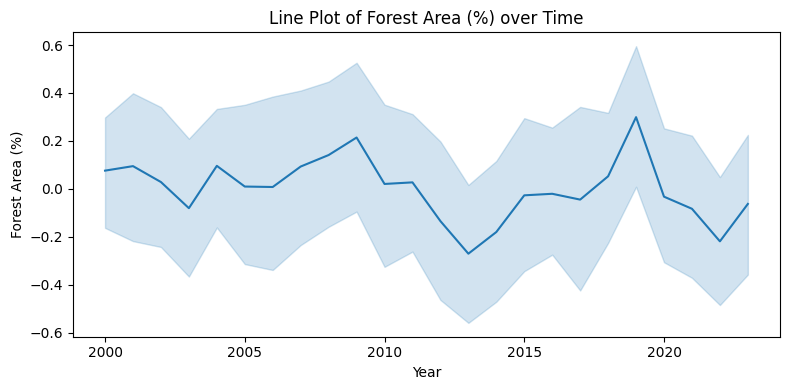

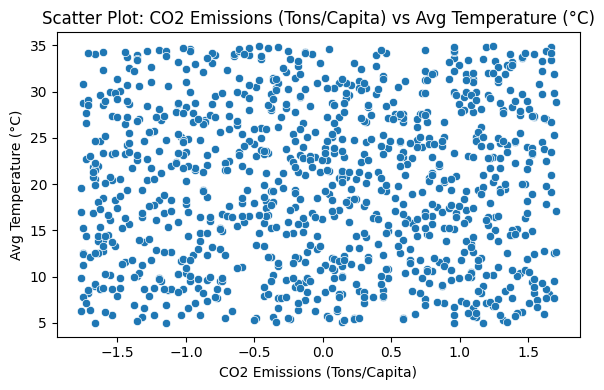

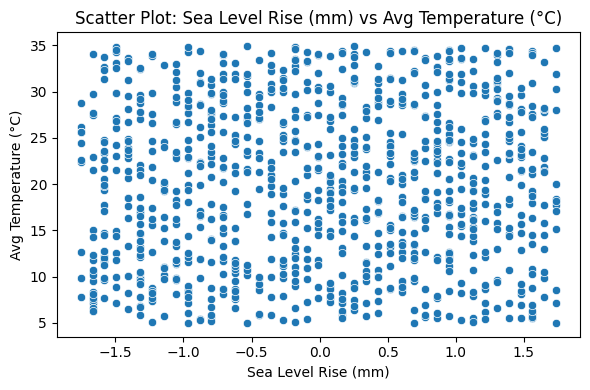

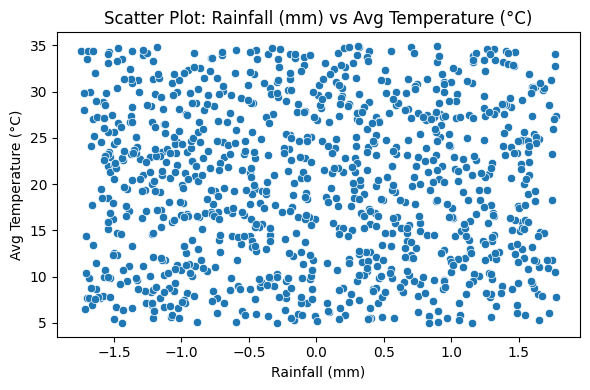

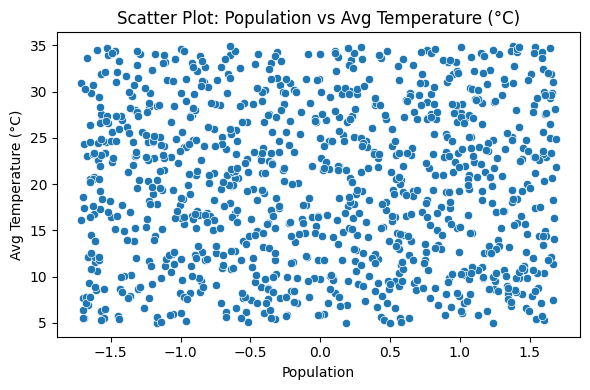

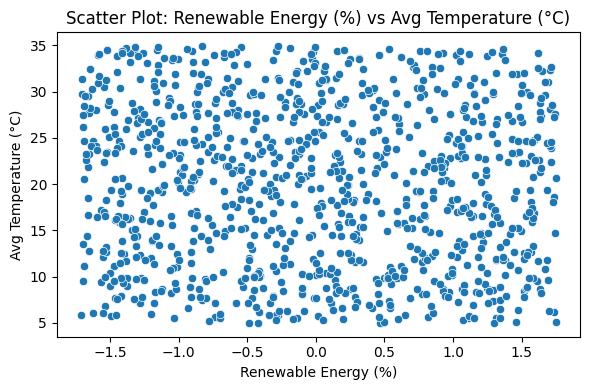

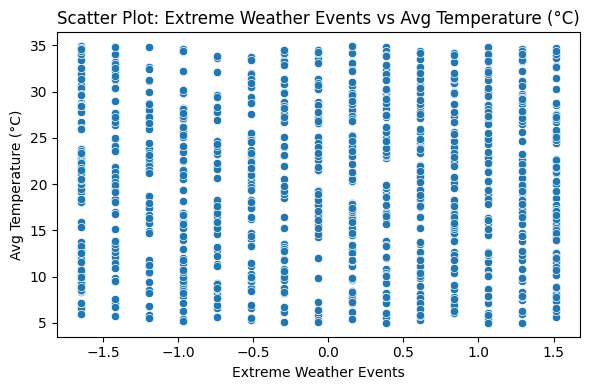

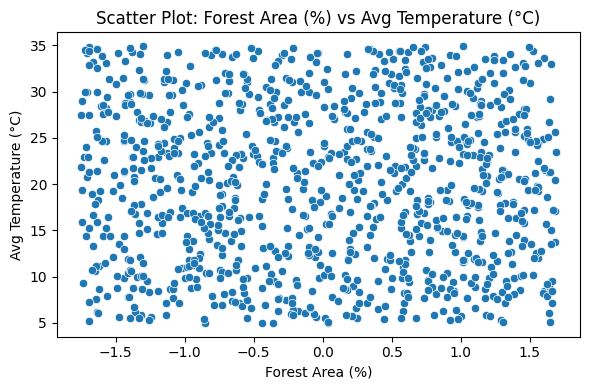

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define target and feature columns
target = 'Avg Temperature (°C)'
feature_cols = [
    'CO2 Emissions (Tons/Capita)',
    'Sea Level Rise (mm)',
    'Rainfall (mm)',
    'Population',
    'Renewable Energy (%)',
    'Extreme Weather Events',
    'Forest Area (%)'
]

# Clean and standardize data
X = df[feature_cols].fillna(df[feature_cols].mean())
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_viz = pd.DataFrame(X_scaled, columns=feature_cols)
df_viz[target] = y.values

# OPTIONAL: If Year column exists, include it for time-based visualizations
if 'Year' in df.columns:
    df_viz['Year'] = df['Year']

# 1. Distribution Plots
for col in df_viz.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_viz[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_viz.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3. Pair Plots
sns.pairplot(df_viz, diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.tight_layout()
plt.show()

# 4. Box Plots
for col in feature_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_viz[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

# 5. Violin Plots by Binned Temperature
df_viz['Temp_Bin'] = pd.qcut(df_viz[target], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
for col in feature_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Temp_Bin', y=col, data=df_viz, inner='box')
    plt.title(f'Violin Plot of {col} by Temperature Bin')
    plt.tight_layout()
    plt.show()

# 6. Line Plots over Time (if 'Year' column is present)
if 'Year' in df_viz.columns:
    for col in feature_cols:
        plt.figure(figsize=(8, 4))
        sns.lineplot(x='Year', y=col, data=df_viz)
        plt.title(f'Line Plot of {col} over Time')
        plt.tight_layout()
        plt.show()

# 7. Scatter Plots (Feature vs Target)
for col in feature_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_viz[col], y=df_viz[target])
    plt.title(f'Scatter Plot: {col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


### Train-Test Split with Sample Weights

This cell splits the standardized data into training and test sets while also computing class-balanced sample weights using `compute_sample_weight`. This ensures that any class imbalance in the target variable is accounted for during model training.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_sample_weight

# Compute sample weights based on the target distribution
sample_weights = compute_sample_weight(class_weight='balanced', y=y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X_scaled, y, sample_weights, test_size=0.2, random_state=42
)

print("Training and test sets created.")
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training and test sets created.
Train set size: 800
Test set size: 200


### Random Forest Model with Cross-Validation

This cell trains a `RandomForestRegressor` using 5-fold cross-validation


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define custom scorer (you can change to R2, MAE, etc.)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation with sample weights
scores = []
for train_idx, val_idx in cv.split(X_train):
    X_t, X_v = X_train[train_idx], X_train[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]
    sw_t = sw_train[train_idx]

    model.fit(X_t, y_t, sample_weight=sw_t)
    preds = model.predict(X_v)
    mse = mean_squared_error(y_v, preds)
    scores.append(mse)

print("Cross-Validation MSE (per fold):", np.round(scores, 4))
print("Average MSE:", np.mean(scores))


Cross-Validation MSE (per fold): [78.084  79.7496 81.9386 80.7746 78.8416]
Average MSE: 79.87767848875


### Model Evaluation and Visualization

This cell evaluates the trained model on the test set by computing the Root Mean Squared Error (RMSE). It also visualizes:

- **Actual vs Predicted Plot**: Compares true temperatures against predicted values using a scatter plot.
- **Residual Distribution Plot**: Analyzes prediction errors by plotting the distribution of residuals (actual - predicted).


Root Mean Squared Error (RMSE): 8.62


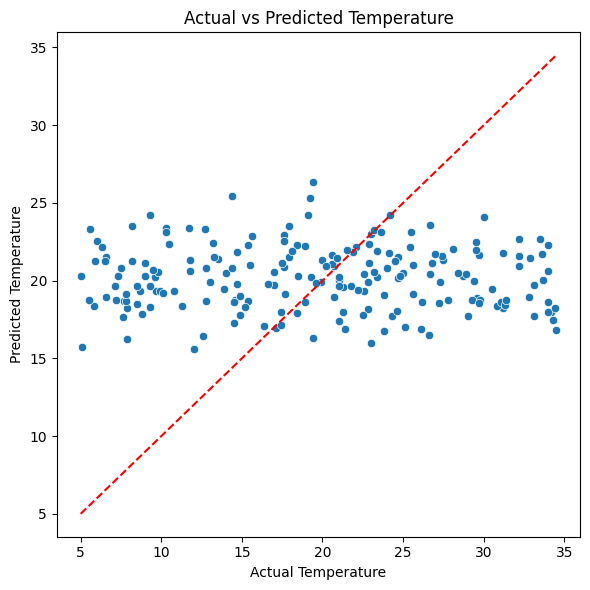

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


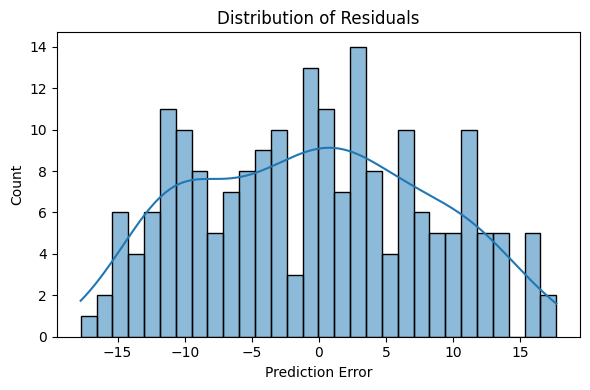

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the trained model
y_pred = model.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.tight_layout()
plt.show()

# Plot: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()


### Random Forest Regression and RMSE Evaluation

This cell trains a `RandomForestRegressor` on the training data and evaluates its performance on the test set using Root Mean Squared Error (RMSE). The result provides a direct measure of the model's prediction error.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse:.2f}")


Random Forest RMSE: 8.74


### LSTM Model for Temperature Prediction

This cell builds and trains a Long Short-Term Memory (LSTM) neural network using Keras. The input data is reshaped to meet the LSTM format, and the model is trained over 20 epochs. The performance is evaluated on the test set using Root Mean Squared Error (RMSE).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Reshape data: LSTM expects [samples, time_steps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)

lstm_pred = lstm_model.predict(X_test_lstm).flatten()
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
print(f"LSTM RMSE: {lstm_rmse:.2f}")


2025-05-27 16:48:13.540652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748364493.767448      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748364493.834578      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1748364507.389458      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748364507.390199      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
LSTM RMSE: 10.93


### Transformer-Based Model for Regression

This cell defines and trains a simple transformer-like model using Keras. It includes a `MultiHeadAttention` layer followed by normalization, dense, and dropout layers. The model is trained for 20 epochs and evaluated using Root Mean Squared Error (RMSE) on the test set.


In [ ]:
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(1, X_train.shape[1]))
x = MultiHeadAttention(num_heads=2, key_dim=4)(input_layer, input_layer)
x = LayerNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)
transformer_model = Model(inputs=input_layer, outputs=x)

transformer_model.compile(optimizer='adam', loss='mse')
transformer_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)

transformer_pred = transformer_model.predict(X_test_lstm).flatten()
transformer_rmse = np.sqrt(mean_squared_error(y_test, transformer_pred))
print(f"Transformer RMSE: {transformer_rmse:.2f}")


I0000 00:00:1748364517.510954     100 service.cc:148] XLA service 0x4970fcd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748364517.511818     100 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748364517.511839     100 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748364519.158986     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Transformer RMSE: 8.31


### RMSE Comparison Across Models

This cell visualizes the RMSE values of three models—Random Forest, LSTM, and Transformer—using a bar plot. It


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


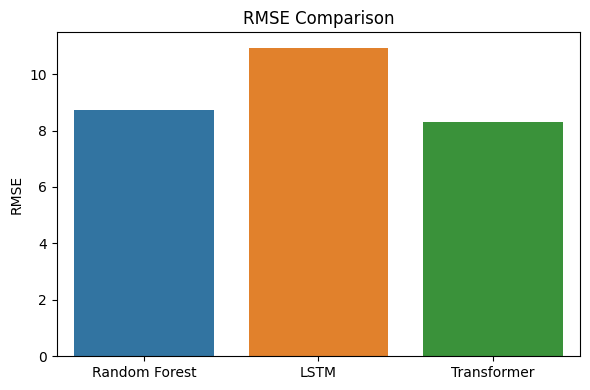

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'LSTM', 'Transformer']
rmse_values = [rf_rmse, lstm_rmse, transformer_rmse]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=rmse_values)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


### MAE Evaluation and Comparison

This cell calculates the Mean Absolute Error (MAE) for the Random Forest, LSTM, and Transformer models. It then visualizes the results using a bar plot, allowing for an intuitive comparison of prediction accuracy across models.


Random Forest MAE: 7.37
LSTM MAE: 9.06
Transformer MAE: 7.01


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


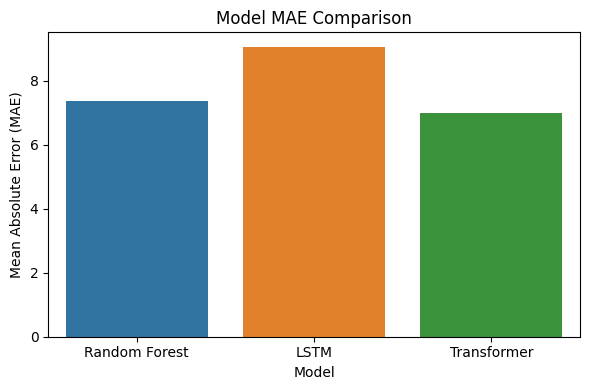

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Compute MAEs
rf_mae = mean_absolute_error(y_test, rf_pred)
lstm_mae = mean_absolute_error(y_test, lstm_pred)
transformer_mae = mean_absolute_error(y_test, transformer_pred)

# Print MAE values
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"LSTM MAE: {lstm_mae:.2f}")
print(f"Transformer MAE: {transformer_mae:.2f}")

# Visualization
models = ['Random Forest', 'LSTM', 'Transformer']
mae_values = [rf_mae, lstm_mae, transformer_mae]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=mae_values)
plt.title('Model MAE Comparison')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.tight_layout()
plt.show()
